In [1]:
# Pcakges
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import theano.tensor as tt
import theano

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data_path = '/Users/smuch/Documents/coding/Study_PyMC3/Dont_overfit/'
#%%
data = pd.read_csv(data_path+'overfitting.csv')

In [3]:
data.head()

,case_id,train,Target_Practice,Target_Leaderboard,Target_Evaluate,var_1,var_2,var_3,var_4,var_5,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,var_200
0,1,1,0,1,0,0.660,0.106,0.434,0.387,0.903,...,0.015,0.377,0.479,0.050,0.395,0.123,0.833,0.461,0.990,0.105
1,2,1,1,0,1,0.844,0.813,0.030,0.939,0.721,...,0.112,0.048,0.088,0.860,0.560,0.346,0.511,0.883,0.858,0.599
2,3,1,0,0,0,0.560,0.567,0.568,0.434,0.414,...,0.874,0.236,0.599,0.602,0.005,0.493,0.122,0.395,0.782,0.943
3,4,1,0,1,1,0.681,0.245,0.909,0.785,0.738,...,0.219,0.691,0.261,0.031,0.968,0.353,0.798,0.104,0.944,0.090
4,5,1,0,1,0,0.846,0.431,0.805,0.237,0.465,...,0.704,0.242,0.089,0.605,0.577,0.043,0.686,0.070,0.666,0.572


In [4]:
training_data = data[data.iloc[:, 1] == 1].iloc[:,5:]
testing_data = data[data.iloc[:, 1] == 0].iloc[:,5:]

training_labels = data[data.iloc[:, 1] == 1].iloc[:,2]
testing_labels = data[data.iloc[:, 1] == 0].iloc[:,2]

print ("training:", training_data.shape, training_labels.shape)
print ("testing: ", testing_data.shape, testing_labels.shape)

training: (250, 200) (250,)
testing:  (19750, 200) (19750,)


50000


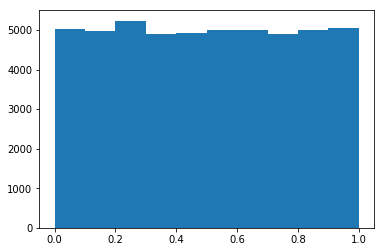

In [5]:
plt.hist(np.array(training_data).flatten())
print (training_data.shape[0] * training_data.shape[1])

In [6]:
training_data = np.array(training_data)
testing_data = np.array(testing_data)

In [57]:
a1 = np.array([0,1,1,0])
print (a1)
b1 = np.array([[1,2,1,2],[3,4,3,4],[5,6,5,6]])
print (b1)
c1 = a1*b1
print(c1)
d1 = np.array([0.1,0.2,0.3,.4])
print (d1)
e1 = np.dot(c1,d1)
print (e1)
f = e1-e1.mean()
print(f)
print (f/np.abs(f))


[0 1 1 0]
[[1 2 1 2]
 [3 4 3 4]
 [5 6 5 6]]
[[0 2 1 0]
 [0 4 3 0]
 [0 6 5 0]]
[0.1 0.2 0.3 0.4]
[0.7 1.7 2.7]
[-1.  0.  1.]
[-1. nan  1.]


In [ ]:
with pm.Model() as model:
# Select the para?
    to_include = pm.Bernoulli("to_include", 0.5, shape=200)
# To give a diss for 200 vars 
    coef = pm.Uniform("coefs", 0, 1, shape=200)   
    def Z(coef, to_include, training_data):
        ym = tt.dot(to_include * training_data, coef)
        return ym - tt.mean(ym)

    def T(z):
        return 0.45 * (tt.switch(tt.eq(z,0),0,tt.switch(z>0,-1,1)) + 1.1)
    Z = pm.Deterministic("Z",Z(coef=coef, to_include=to_include, training_data=tt.as_tensor(training_data)))
    T = pm.Deterministic("T",T(Z))
    
    obs = pm.Bernoulli("obs", T, observed=training_labels)
    
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(100000, step=step, start=start)


logp = -312.05, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 421.05it/s]
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [coefs_interval__]
>Metropolis: [to_include]
 94%|█████████▍| 94775/100500 [03:03<00:11, 515.93it/s]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2a673390>,
      dtype=object)

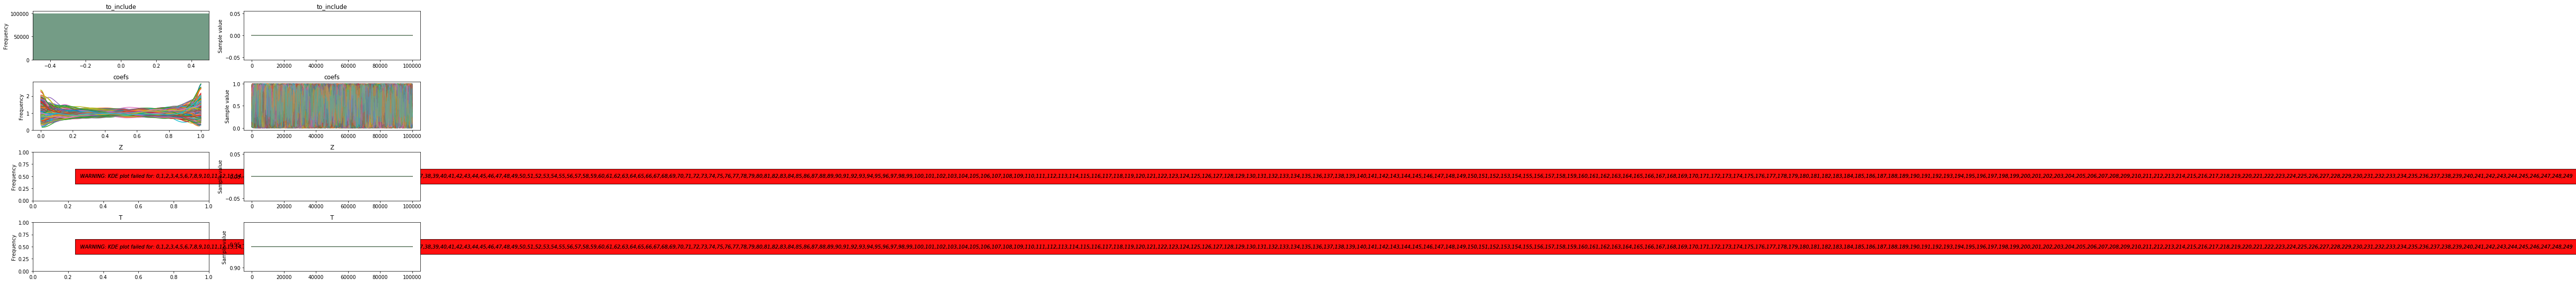

In [92]:
pm.traceplot(trace)

In [95]:
(np.round(np.mean(trace["T"][-500:-100,:],0))== training_labels).mean()

0.476

In [86]:
print (np.round(np.mean(trace["T"][1:10,:],0)))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
